

<h1>The segment below is related to the Baryonic Acoustic Oscillations. I wanted to see how my theory would deal with that. This is work in progress</h1>

<br>
<br>

Current Density is related to the speed of light by Energy Conservation:

$$ \rho=\frac{c^2}{0.776 *G *2 \pi^2R_0^2} $$

# Calculation of the energy available for the Many-Bangs

$$ volume(n, \phi) = \frac{ 2*\pi^{(\frac{n-1}{2})}*\int_{0}^{\pi}{sin(x)^{(n - 2)}dx}}{\Gamma(\frac{n-1}{2})}R^3 $$

#  I will consider the volume of the Visible Universe only (1 radian as opposed to pi radians)

$$ \frac{{P\left( {n,{\text{ }}x} \right)}}{{{n_0}{\text{ }}{T_0}{\text{ }}}}{\text{ }} = {\text{ }}\frac{x}{{{T_0}}}\left( {Mp - Mn - Me} \right){\left( {\frac{n}{{{n_0}}}} \right)^2} + \frac{2}{5}[{x^{5/3}} + {\text{ }}{(1 - x)^{5/3}}]{(\frac{{2n}}{{{n_0}}})^{2/3}} - [(2\alpha  - 4{\alpha _L})x(1 - x){\text{ }} + {\alpha _L}]{\left( {\frac{n}{{{n_0}}}} \right)^2} + {\text{ }}\gamma [(2\eta  - 4{\eta _L})x(1 - x){\text{ }} + {\eta _L}]{(\frac{n}{{{n_0}}})^{\gamma  + 1}} $$

$$ \frac{{\varepsilon (n,x)}}{{{n_0T_0}}} = \frac{1}{{{T_0}}}\left( {Mn(1-x) + xMp } \right)\frac{n}{{{n_0}}} + \frac{3}{5}[{x^{5/3}} + {\text{ }}{(1 - x)^{5/3}}]{(\frac{{2n}}{{{n_0}}})^{2/3}} - [(2\alpha  - 4{\alpha _L})x(1 - x){\text{ }} + {\alpha _L}]\frac{n}{{{n_0}}} + {\text{ }}[(2\eta  - 4{\eta _L})x(1 - x){\text{ }} + {\eta _L}]{(\frac{n}{{{n_0}}})^\gamma } $$



$$ {T_0}{\text{ }} = {\text{ }}{\left( {\frac{{3{\pi ^{\text{2}}}{n_0}}}{2}} \right)^{\frac{2}{3}}}\frac{{{\hbar ^2}}}{{2m}} $$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
from scipy.fftpack import fft
from parameters import *
from astropy import constants as cc, units as uu
from lib1 import *
from lib2 import *
pd.set_option('display.float_format', lambda x: '%.3e' % x)
from PyAstronomy import *
import itertools
from pandas.plotting._matplotlib.style import get_standard_colors
# Processing Sound Speed on Neutronium.  Data from article was dependent upon energy density MeV/fm3 
# as opposed to seconds.
# https://arxiv.org/pdf/1303.4662.pdf

# print("[")
# for xx in vssquared:
#     y0=xx[0]*(uu.MeV/uu.fm**3)/mn/n0
#     t,y,r=whatTimeRadius(y0)
#     print("[",t,",", np.sqrt(xx[1]),"],")
# print("]")
today=4.428e+17
defaultsize=[6,4]

36.820519487210284 MeV


In [2]:
K=236.0*uu.MeV
B=16.0*uu.MeV
L=50.0*uu.MeV
S=32.0*uu.MeV
MP= (cc.m_p*cc.c**2).to("MeV")
MN= (cc.m_n*cc.c**2).to("MeV")
ME= 0.782*uu.MeV
pi= np.pi
n0=0.16/uu.fm**3
# n0=0.054/uu.fm**3
hydrogenatom=cc.m_p+cc.m_e
T0=((3*np.pi**2*n0/2)**(2/3)*cc.hbar**2/(2*cc.m_n)).to("MeV")
hydrogenatomwavelength = (cc.h/(hydrogenatom*cc.c)).si
hydrogenatomwavelength, T0, K, B, L,S,MP, MN, ME
x0 = ((((mn - mp) / cc.hbar / cc.c / (3 * np.pi ** 2 * 0.5 * n0) ** (1 / 3))).si) ** 3


alpha = -2*(5*B*K - 3*(4*B - K)*T0)/(5*(9*B - K)*T0 + 3*T0**2)
eta = -18/5*(25*B**2 + 10*B*T0 + T0**2)/(5*(9*B - K)*T0 + 3*T0**2)
gamma = 1/9*(5*K + 6*T0)/(5*B + T0)
alpha_L = 1/6*(3*T0*alpha - 3*T0*eta + 6*T0*eta_L - 6*S + 2*T0)/T0
eta_L = 1/18*(9*T0*eta*gamma - 9*T0*alpha + 18*T0*alpha_L + 6*L - 4*T0)/(T0*gamma)
print(alpha, eta, gamma,eta_L,alpha_L, T0, n0)

5.886377262540154 3.81729663995102 1.3324553322126458 0.7348966481217688 1.1487930220387674 36.820519487210284 MeV 0.16 1 / fm3


In [3]:
# n0=0.16*d_units
# gamma= 4/3  # 4/3 is actually the gamma of the gas phase
# alpha= 5.87
# eta=3.81
# alpha_L= 1.2
# eta_L= 0.65

In [4]:
myU=Universe(eta, alpha, alpha_L, eta_L, T0, gamma, n0,vs_pd)
myU.find_k0([2.26414986e+01, 1.32226173e-02, 1.55251641e-03])
myU.getEnergyPressure()
myU.df["TemperatureDensity"]= myU.df.Temperature*myU.df.Density

Optimization terminated successfully.
         Current function value: 0.037271
         Iterations: 61
         Function evaluations: 130


/mnt/hd_1/GitHub/AAA_CMB_HU/lib1.py:416: RuntimeWarning: overflow encountered in exp
  return vs0 / (1 + np.exp(beta * (x - n0)))
/mnt/hd_1/GitHub/AAA_CMB_HU/lib1.py:235: RuntimeWarning: invalid value encountered in double_scalars
  return (4 / 3) ** (self.k0[1] * a ** self.k0[2])


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 249
         Function evaluations: 521


In [5]:
findGammaT(0.5)

(array([1.33333333]),
 1262.3321953712239,
 <Quantity 11105550.90055103 lyr>,
 <Quantity 3.50464533e+14 s>,
 <Quantity 3.75418988e-35>,
 <Quantity 3443.18663184 K>)

In [6]:
myU.createReport(cosmologicalangle=2, filename="./ObservableUniverse.xls")

2.890750539047369e+79 m3 4.9897586281092144e-27 kg / m3 1.4424147443922973e+53 kg
Optimized K0 =  [ 2.97213797e-05 -3.95952894e-01  3.71525594e-02]

 Initial 4D Radius of the Universe =  841.6105111907682 3.16881e-08 lyr 



 Initial Volume of the Observable Universe 9.028281491499208e+42 m3 
 Number of Neutrons 8.611804069610242e+79 
 MassOfUniverse for 2 radians = 1.4424147443922973e+53 kg 
 BigBangEnergy =  1.079730998662363e+74 erg 
 BigBangEnergyDensity =  1.1959429927821917e+24 J / m3 
 EnergyPerSupernova =  1e+51 erg 
 Number of Supernovae =  1.079730998662363e+23 
 Cell Length =  1.3206905848167287e-15 m 
 Current Density =  4.9897586281092144e-27 kg / m3 

                  n/n0  Time (s)  Radius (lyr)  Density (Kg/m3)  \
Blackholium  8.000e+00 0.000e+00     2.667e-05        2.144e+18   
PreFreezing  1.996e+00 4.953e+02     4.237e-05        5.348e+17   
Neutronium   3.391e-01 1.572e+03     7.648e-05        9.089e+16   
Freezing     3.326e-01 1.588e+03     7.698e-05        8.91

/mnt/hd_1/GitHub/AAA_CMB_HU/lib1.py:178: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  self.x_Seq.to_excel(filename)


In [7]:
myU.createReport(cosmologicalangle=2*np.pi, filename="./HypersphericalUniverse.xls")

1.3622340985247927e+80 m3 4.9897586281092144e-27 kg / m3 6.797219346618662e+53 kg
Optimized K0 =  [ 2.97213797e-05 -3.95952894e-01  3.71525594e-02]

 Initial 4D Radius of the Universe =  841.6105111907682 3.16881e-08 lyr 



 Initial Volume of the Hyperspherical Universe 4.2544774212351926e+43 m3 
 Number of Neutrons 4.0582170598863335e+80 
 MassOfUniverse for 6.283185307179586 radians = 6.797219346618662e+53 kg 
 BigBangEnergy =  5.088112459876276e+74 erg 
 BigBangEnergyDensity =  1.1959429927821915e+24 J / m3 
 EnergyPerSupernova =  1e+51 erg 
 Number of Supernovae =  5.088112459876276e+23 
 Cell Length =  1.3206905848167287e-15 m 
 Current Density =  4.9897586281092144e-27 kg / m3 

                  n/n0  Time (s)  Radius (lyr)  Density (Kg/m3)  \
Blackholium  8.000e+00 0.000e+00     2.667e-05        2.144e+18   
PreFreezing  1.996e+00 4.953e+02     4.237e-05        5.348e+17   
Neutronium   3.391e-01 1.572e+03     7.648e-05        9.089e+16   
Freezing     3.326e-01 1.588e+03     

/mnt/hd_1/GitHub/AAA_CMB_HU/lib1.py:178: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  self.x_Seq.to_excel(filename)


# PLOTS

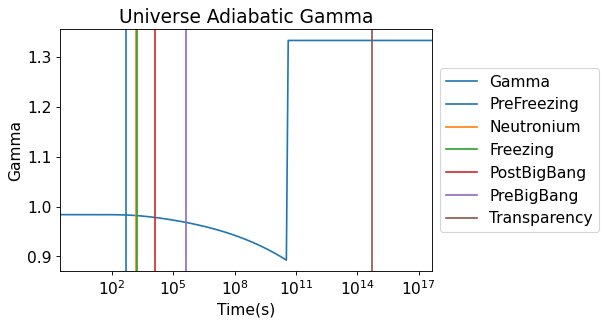

In [8]:
# Plot 1
tmin=1E0
tmax=today
dmin = 1E-27
dmax = 1E20

colors = get_standard_colors(num_colors=10)

plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'

t_post_bigbang=myU.y_Seq.loc["densityPostBigBang","t"]
trans=myU.df
x=trans.t
y=[myU.getgamma(x)  for x in trans.Density]
data = zip(x,y)
myd=pd.DataFrame(data, columns=["t","Gamma"])

ax=myd.plot(x="t",y="Gamma", logx=True)
ax.set_title("Universe Adiabatic Gamma")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Gamma")
ax.set_xlim(None,today)

##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
for xc,c, name in zip(xcoords,colors, xnames):
    if tmin<=xc:
        ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
##########################################################


plt.savefig(imgAddress + "GammaProfile.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

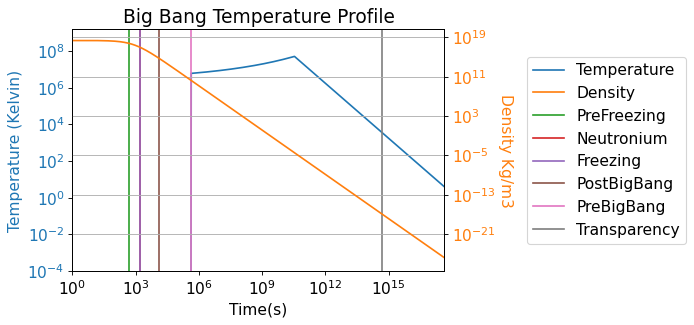

In [9]:
# Plot 2


x_Seq=myU.y_Seq.iloc[1:-1:]
ax=myU.df.plot(x="t", y="Temperature", logx=True, logy=True, legend=False, color=colors[0])
partOfLegend =((x_Seq.t-tmin)*(x_Seq.t-tmax)<=0)
ax.set_xlim(tmin,tmax)
ax.set_ylim(1E-4,1.5E9)
ax.set_title("Big Bang Temperature Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Temperature (Kelvin)", c=colors[0])
ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Density", logx=True, logy=True, legend=False, ax=ax1, color=colors[1])
# ax1.set_ylim(1E-2,None)
ax1.set_ylabel("Density Kg/m3",color=colors[1], rotation=270,labelpad=15)

##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xnames=[]
xcoords =[]
for x, t, includeit in zip(x_Seq.index, x_Seq.t, partOfLegend):
    if includeit:
        xnames.append(x.replace("density","").replace("At",""))
        xcoords.append(t)
    
# colors for the lines
ax.axvline(label="Density", c=colors[1])


for xc,c, name in zip(xcoords,colors[2:len(xnames)+2], xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################

plt.grid(True)
for tl in ax1.get_yticklabels():
    tl.set_color(colors[1])
for tl in ax.get_yticklabels():
    tl.set_color(colors[0])
plt.savefig(imgAddress + "TemperatureProfileNotLog.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [10]:
myU.y_Seq

,y,t,radius,Density
densityBlackholium,8.000e+00,0.000e+00,2.667e-05,2.144e+18
densityAtPreFreezing,1.996e+00,4.953e+02,4.237e-05,5.348e+17
densityNeutronium,3.391e-01,1.572e+03,7.648e-05,9.089e+16
densityAtFreezing,3.326e-01,1.588e+03,7.698e-05,8.913e+16
densityPostBigBang,1.783e-03,1.304e+04,4.399e-04,4.779e+14
densityPreBigBang,5.962e-08,4.300e+05,1.365e-02,1.598e+10
densityAtTransparency,3.754e-35,5.027e+14,1.593e+07,1.006e-17
densityToday,1.862e-44,6.351e+17,2.012e+10,4.990e-27


In [11]:
x_Seq

,y,t,radius,Density
densityAtPreFreezing,1.996e+00,4.953e+02,4.237e-05,5.348e+17
densityNeutronium,3.391e-01,1.572e+03,7.648e-05,9.089e+16
densityAtFreezing,3.326e-01,1.588e+03,7.698e-05,8.913e+16
densityPostBigBang,1.783e-03,1.304e+04,4.399e-04,4.779e+14
densityPreBigBang,5.962e-08,4.300e+05,1.365e-02,1.598e+10
densityAtTransparency,3.754e-35,5.027e+14,1.593e+07,1.006e-17


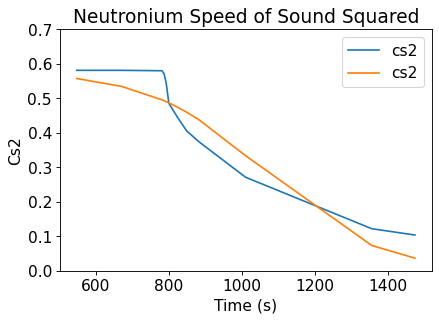

In [12]:
# Plot 3


plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'


fig, ax = plt.subplots()
(myU.df2).plot(ax=ax, x="t", y="cs2")
(myU.df1).plot(x="t", y="cs2", ax=ax)
ax.set_title("Neutronium Speed of Sound Squared")
ax.set_ylabel("Cs2")
ax.set_xlabel("Time (s)")
ax.set_ylim(0,0.7)


plt.savefig(imgAddress + "NeutroniumSoundSpeed.png", dpi=300)

In [13]:
myU.xSound

array([6.48648954e-03, 1.05823880e+03])

In [14]:
whatIsY(1.05823880e+03*uu.s)

(1058.2388, <Quantity 0.6954501>, 6.020259180643547e-05)

In [15]:
dbh, n0

(<Quantity 7.26492273e+17 kg / m3>, <Quantity 0.16 1 / fm3>)

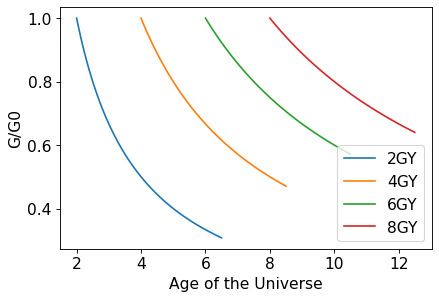

In [16]:
# Plot 4

fig, ax = plt.subplots()
for initialT in range(2,10,2):
    t=np.linspace(initialT, initialT+4.5,100)
    GG=initialT/t
    ax.plot(t,GG,label=str(initialT) + "GY")
    ax.legend()
    ax.set_ylabel("G/G0")
    ax.set_xlabel("Age of the Universe")
plt.savefig(imgAddress + "G_Decay.png", dpi=300)

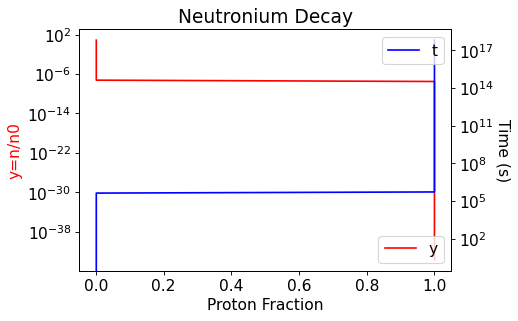

In [17]:
# plot 5

ax=myU.df.plot(x="Proton_Fraction", y="y", color='r', title="Neutronium Decay", logy=True)
ax.set_xlabel("Proton Fraction")
ax.set_ylabel("y=n/n0", color='r')
ax.legend("y", loc="lower right")
# ax.set_ylim(5E-8,1E-3)


ax2=plt.twinx(ax)

myU.df.plot(x="Proton_Fraction",y="t", color='b', logy=True, ax=ax2, legend=False)
ax2.legend("t", loc="upper right")
ax2.set_ylabel("Time (s)", rotation=270,labelpad=15)
# ax2.set_ylim(1E4,4e6)
plt.savefig(imgAddress + "NeutroniumDecay.png")


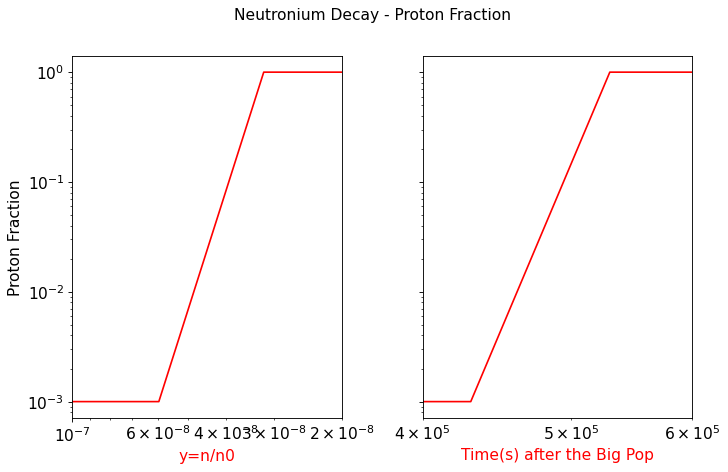

In [87]:
# plot 5
fig = plt.figure(figsize=[10, 6])
gs = fig.add_gridspec(1, 2, hspace=0, wspace=.3)
axs = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Neutronium Decay - Proton Fraction')
myU.df.plot(x="y", y="Proton_Fraction", color='r', ax=axs[0], logy=True, logx=True,legend=False)
axs[0].set_ylabel("Proton Fraction")
axs[0].set_xlabel("y=n/n0", color='r')
axs[0].set_xlim(1E-7,2E-8)

myU.df.plot(x="t", y="Proton_Fraction", color='r', ax=axs[1], logy=True, logx=True,legend=False)
axs[1].set_ylabel("Proton Fraction")
axs[1].set_xlabel("Time(s) after the Big Pop", color='r')
axs[1].set_xlim(4E5,6E5)
plt.savefig(imgAddress + "NeutroniumDecayFractionVersusY.png")

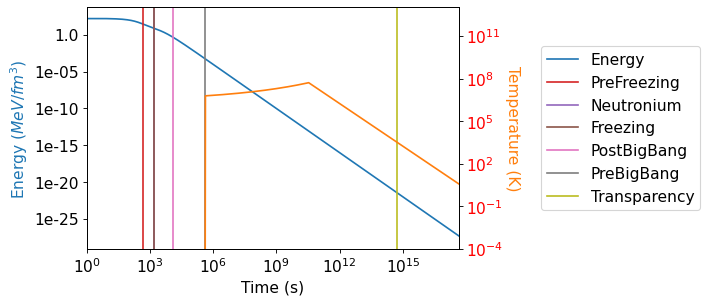

In [18]:
# Plot 6

import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter

ax=myU.df.plot(x="t", y="Energy", color=colors[0], logx=True, logy=True, legend=False)
ax.set_xlim(tmin,today)
# ax.set_ylim(1E-4, 1E5)

ax.set_xlabel("Time (s)")


##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[0:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
# ax.axvline(label="Energy", c=colors[0])
# ax.axvline(label="Temperature", c=colors[1])


fmt = lambda x, pos: '{}'.format(x, pos)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Temperature", ax=ax1, color=colors[1],logx=True, logy=True, legend=False)
# ax1.set_xlim(1E2,1E5)
ax1.set_ylim(1E-4,1E13)
for tl in ax1.get_yticklabels():
    tl.set_color('r')
ax.set_ylabel("Energy ($MeV/fm^3$)", color=colors[0],)
ax1.set_ylabel("Temperature (K)", color=colors[1], rotation=270,labelpad=15)
for xc,c, name in zip(xcoords,colors[2:], xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################
plt.savefig(imgAddress + "EnergyTemperature.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


/tmp/ipykernel_12239/4172945141.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,1200)


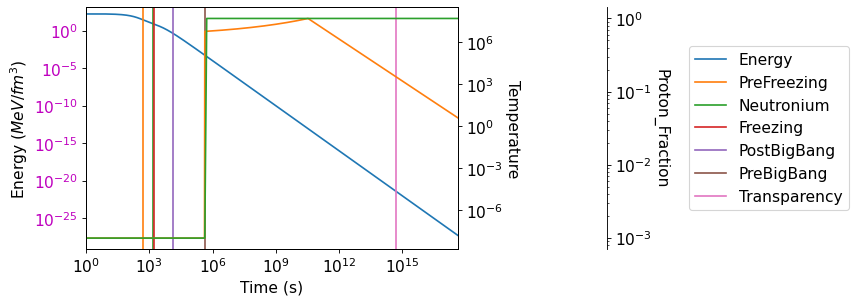

In [19]:
# Plot 6
spacing=.4
cols=['Energy','Temperature', 'Proton_Fraction']
data =myU.df.copy()
data.index = data.t
# ax = plot_multi( myU.df,cols=['Temperature', 'Energy','Proton_Fraction'], spacing=.3)



# First axis
ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0],logx=True, logy=True )
ax.set_ylabel(ylabel=cols[0])
ax.set_ylim(0,1200)
ax.set_xlim(tmin,today)
lines, labels = ax.get_legend_handles_labels()


for xc,c, name in zip(xcoords,colors, xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)



for n in range(1, len(cols)):
    # Multiple y-axes
    ax_new = ax.twinx()
    ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
    data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], logx=True, logy=True)
    ax_new.set_ylabel(ylabel=cols[n], rotation=270, labelpad=15)

    # Proper legend position
    line, label = ax_new.get_legend_handles_labels()
    lines += line
    labels += label

ax.set_ylabel("Energy ($MeV/fm^3$)")
ax.set_xlabel("Time (s)")    
    
# ax.legend(lines, labels, loc=4)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.6, 0.5))

for tl in ax.get_yticklabels():
    tl.set_color('m')

/tmp/ipykernel_12239/2483604848.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,1200)


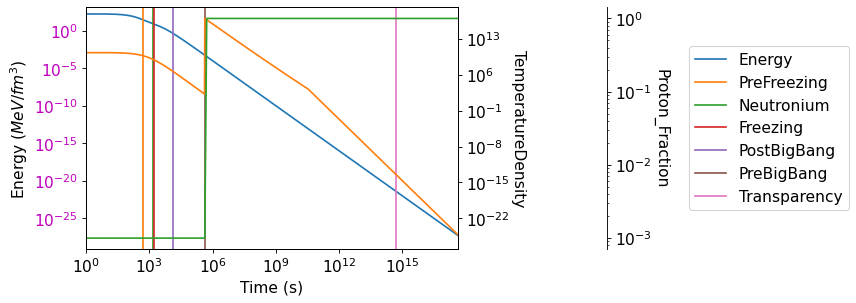

In [20]:
# Plot 7
spacing=.4
cols=['Energy','TemperatureDensity', 'Proton_Fraction']
data =myU.df.copy()
data.index = data.t


# First axis
ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0],logx=True, logy=True )
ax.set_ylabel(ylabel=cols[0])
ax.set_ylim(0,1200)
ax.set_xlim(tmin,tmax)
lines, labels = ax.get_legend_handles_labels()

for xc,c, name in zip(xcoords,colors, xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)



for n in range(1, len(cols)):
    # Multiple y-axes
    ax_new = ax.twinx()
    ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
    data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], logx=True, logy=True)
    ax_new.set_ylabel(ylabel=cols[n], rotation=270, labelpad=15)

    # Proper legend position
    line, label = ax_new.get_legend_handles_labels()
    lines += line
    labels += label

ax.set_ylabel("Energy ($MeV/fm^3$)")
ax.set_xlabel("Time (s)")    
    
# ax.legend(lines, labels, loc=4)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.6, 0.5))

for tl in ax.get_yticklabels():
    tl.set_color('m')

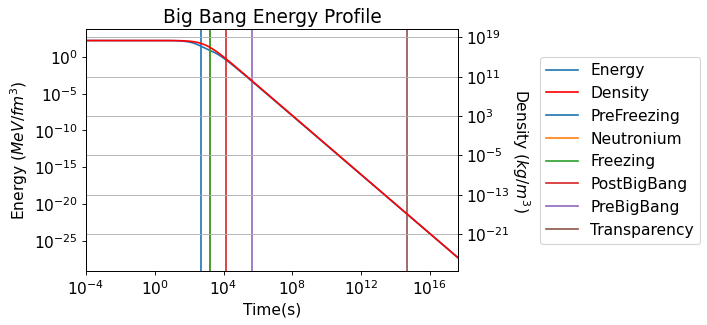

In [21]:
# Plot 8

ax=myU.df.plot(x="t", y="Energy", logx=True, logy=True)
ax.set_xlim(1E-4,today)
# ax.set_ylim(None,1E6)
ax.set_title("Big Bang Energy Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Energy ($MeV/fm^3$)")


ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Density", ax=ax1, color="r",logx=True, logy=True, legend=False)
ax1.set_ylabel("Density ($kg/m^3$)", rotation=270, labelpad=20)
ax.axvline(label="Density", c="r")
##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines

for xc,c, name in zip(xcoords,colors, xnames):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################


plt.grid(True)
plt.savefig(imgAddress + "EnergyProfile.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [22]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas.plotting._matplotlib.style import get_standard_colors

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = get_standard_colors(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=cols[n])
        
        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    return ax


In [23]:

get_standard_colors(num_colors=5)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

In [24]:
xcoords.values[1]

1572.065004065059

In [25]:
findGammaT(0.5)

(array([1.33333333]),
 1262.3321953712239,
 <Quantity 11105550.90055103 lyr>,
 <Quantity 3.50464533e+14 s>,
 <Quantity 3.75418988e-35>,
 <Quantity 3443.18663184 K>)

In [26]:
1.3836921039591985e-35*dbh

<Quantity 1.00524162e-17 kg / m3>

In [27]:
myU.k0

array([ 2.97213797e-05, -3.95952894e-01,  3.71525594e-02])

In [28]:
from astropy import constants, units



mp=(cc.m_p*cc.c**2).to("MeV")
mn=(cc.m_n*cc.c**2).to("MeV")
me=(cc.m_e*cc.c**2).to("MeV")
m_neutrino=0.086E-6*uu.MeV
m_hydrogen=cc.m_p+cc.m_e
deBroglieLambda= (cc.h/(m_hydrogen*cc.c)).si

dneutron=cc.m_n/(2*deBroglieLambda)**3
dneutronMev_fm3=(dneutron*cc.c**2).to('MeV/fm**3')

In [29]:
dneutronMev_fm3

<Quantity 50.98398673 MeV / fm3>

In [30]:
dbh_t

<Quantity 841.61051119 s>

In [31]:
dbhMev_fm3/8

<Quantity 50.94153468 MeV / fm3>

In [32]:
cc.m_n

<<class 'astropy.constants.codata2018.CODATA2018'> name='Neutron mass' value=1.67492749804e-27 uncertainty=9.5e-37 unit='kg' reference='CODATA 2018'>

In [33]:
today=4.428e+17

In [34]:
myU.df1

,cs2,t
1.474e+03,3.652e-02,1.474e+03
1.355e+03,7.332e-02,1.355e+03
1.010e+03,3.335e-01,1.010e+03
8.813e+02,4.383e-01,8.813e+02
8.486e+02,4.594e-01,8.486e+02
8.236e+02,4.739e-01,8.236e+02
7.999e+02,4.863e-01,7.999e+02
7.927e+02,4.899e-01,7.927e+02
7.869e+02,4.926e-01,7.869e+02
7.814e+02,4.952e-01,7.814e+02


In [35]:
rho=(cc.c**2/(0.776*cc.G*2*np.pi**2*(14.03E9*uu.lyr)**2)).si
(rho/hydrogenatom).si

<Quantity 2.98157194 1 / m3>

In [36]:
(myU.df.iloc[-1:].Energy.values[0]*uu.MeV/cc.k_B).si*2/3

<Quantity 1.90592602e-18 K>

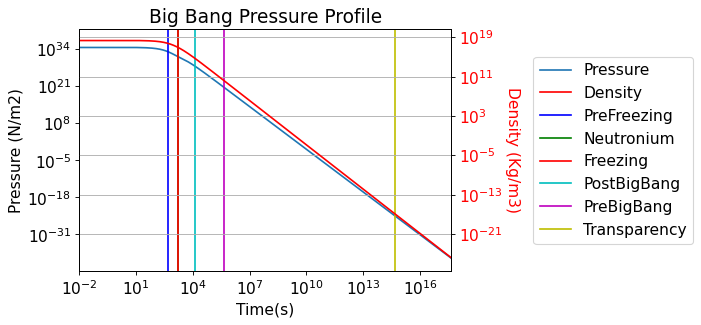

In [37]:
plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'

ax=myU.df.plot(x="t", y="Pressure", logx=True, logy=True)
ax.set_xlim(1E-2,today)
ax.set_ylim(None,1E41)
ax.set_title("Big Bang Pressure Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Pressure (N/m2)")
ax1=plt.twinx(ax)


##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
ax.axvline(label="Density", c="r")
colors = ['b','g','r','c','m','y','k','b','g','r']
for xc,c, name in zip(xcoords,colors, xnames):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.20, 0.5))
##########################################################

    
myU.df.plot(x="t", y="Density", logx=True, logy=True, ax=ax1, color="r", legend=False)

ax1.set_ylabel("Density (Kg/m3)",color="r")

# colors for the lines
ax1.set_ylabel("Density (Kg/m3)", rotation=270,labelpad=15)
for tl in ax1.get_yticklabels():
    tl.set_color('r')
plt.grid(axis='y')
plt.savefig(imgAddress + "PressureProfile.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

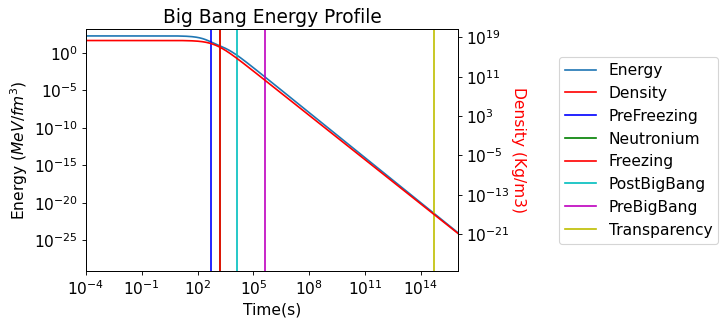

In [38]:
plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'

ax=myU.df.plot(x="t", y="Energy", logx=True, logy=True)
ax.set_xlim(1E-4,1E16)
ax.set_ylim(None,1.2E3)
ax.set_title("Big Bang Energy Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Energy ($MeV/fm^3$)")

ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Density", logx=True, logy=True, ax=ax1, color="r",legend=False)

# colors for the lines
ax1.set_ylabel("Density (Kg/m3)", color="r", rotation=270,labelpad=15)
##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
ax.axvline(label="Density", c="r")
colors = ['b','g','r','c','m','y','k','b','g','r']
for xc,c, name in zip(xcoords,colors, xnames):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
##########################################################


plt.savefig(imgAddress + "UniverseEnergyProfile.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

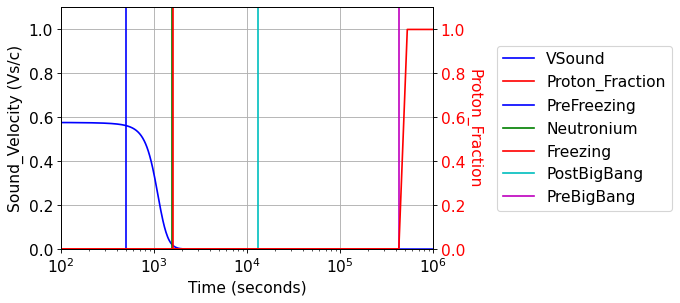

In [39]:
plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'


ax=myU.df.plot(x="t", y= "VSound",logx=True, color="b", legend=False)

ax.set_xlim(1E2,1E6)
ax.set_ylim(0,1.1)

ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Sound_Velocity (Vs/c)")
ax.grid(True)



##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
ax.axvline(label="Proton_Fraction", c="r")
colors = ['b','g','r','c','m','y','k','b','g','r']
for xc,c, name in zip(xcoords[0:5],colors[0:5], xnames[0:5]):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))
##########################################################



ax2=plt.twinx(ax)    
myU.df.plot(x="t", y="Proton_Fraction", ax=ax2,logx=True, color="r", legend=False)
ax2.set_ylim(0,1.1)
ax2.set_ylabel("Proton_Fraction",color="r", rotation=270, labelpad=15)
ax2.set_xlim(1E2,1E6)

for tl in ax2.get_yticklabels():
    tl.set_color('r')


plt.savefig(imgAddress + "NeutroniumSpeedOfSoundVersusDecay.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


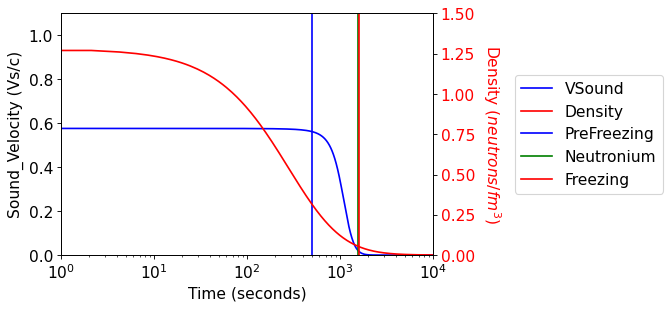

In [40]:
plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'


ax=myU.df.plot(x="t", y= "VSound",logx=True, color="b")

ax.set_xlim(1E0,1E4)
ax.set_ylim(0,1.1)

ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Sound_Velocity (Vs/c)")
ax.legend(loc="center")


##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
ax.axvline(label="Density", c="r")
colors = ['b','g','r','c','m','y','k','b','g','r']
for xc,c, name in zip(xcoords[0:3],colors[0:3], xnames[0:3]):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################

ax2=plt.twinx(ax)    
myU.df["n*n0"]= [(x*n0).to("1/fm**3").value for x in myU.df.y]
myU.df.plot(x="t", y="n*n0", ax=ax2,logx=True,logy=False, color="r", legend=False)
ax2.set_ylim(0,1.5)
ax2.set_ylabel("Density ($neutrons/fm^3$)",color="r", rotation=270, labelpad=25)
ax2.set_xlim(1E0,1E4)

for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.savefig(imgAddress + "NeutroniumSpeedOfSound.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# Creation of CMB Spherical Distribution

$$ z=cos(\phi) $$
$$ y=sin(\phi)sin(\theta)  $$
$$ x=sin(\phi)cos(\theta)  $$

In [41]:
x0=myU.x_Seq.loc["Neutronium","Time (s)"]
x1=myU.x_Seq.loc["PreFreezing","Time (s)"]
x2=myU.x_Seq.loc["Freezing","Time (s)"]
xSound=myU.xSound
phase0=PhaseVS(x0,x2,myU.xSound)
print(phase0, 2*np.pi/phase0)

0.00012307742128756096 51050.67396967479


In [42]:
x_Seq

,y,t,radius,Density
densityAtPreFreezing,1.996e+00,4.953e+02,4.237e-05,5.348e+17
densityNeutronium,3.391e-01,1.572e+03,7.648e-05,9.089e+16
densityAtFreezing,3.326e-01,1.588e+03,7.698e-05,8.913e+16
densityPostBigBang,1.783e-03,1.304e+04,4.399e-04,4.779e+14
densityPreBigBang,5.962e-08,4.300e+05,1.365e-02,1.598e+10
densityAtTransparency,3.754e-35,5.027e+14,1.593e+07,1.006e-17


In [43]:
n0

<Quantity 0.16 1 / fm3>